In [7]:
import datetime
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
from IPython.core.display import HTML,display,Image
display(HTML("<style>.container { width:95% !important; }</style>"))

In [8]:
df=pd.read_csv('time_series_covid19_confirmed_US.csv')
df.columns[-14:]
mydict={}
for i, r in df.iterrows():
    
    #print(r)
    last_points=np.array(list(r[-12:]))
    #print(list(last_points))
    try:
        slope = np.polyfit(range(11),np.diff(last_points)/min(last_points),1)[0]
    except:
        state='Same'
        slope=0
    if slope > 0:
        state='Getting Worse'
    else:
        state='Improving'
    maxxer=max(last_points)
    if last_points[-1] < 500:
        continue
    if maxxer > last_points[-1]:
        continue
    mydict[i]={'slope':slope , 'Index':r['UID'], 'Name':r['Combined_Key'],'State':r['Province_State'], \
               'data':list(r[-30:]), 'Max':maxxer }


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import matplotlib as mpl
import matplotlib.cm as cm
norm = mpl.colors.Normalize(vmin=0, vmax=30000)
cmap = plt.cm.Blues
m = cm.ScalarMappable(norm=norm, cmap=cmap)

def sparkline(data, figsize=(5, 3), **kwags):
    """
    Returns a HTML image tag containing a base64 encoded sparkline style plot
    """
    
    data = list(data)
    
 
    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwags)
    ax.set_ylim(0,max(data)*1.2)
    ax.plot(data)
    
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0,max(data)*1.2)
    
 
    plt.plot(len(data) - 1, data[len(data) - 1], 'r.')
    plt.text(len(data) - 1, data[len(data) - 1], np.round(data[len(data) - 1],-1).astype(int))
 
    #ax.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.8, color=m.to_rgba(np.mean(data)) )
    ax.fill_between(range(len(data)), data, len(data)*[0], alpha=0.8, color=m.to_rgba(np.mean(data)) )
 
    img = BytesIO()
    plt.savefig(img, transparent=True, bbox_inches='tight')
    img.seek(0)
    plt.close()
 
    return base64.b64encode(img.read()).decode("UTF-8")

pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,}'.format

#p.loc[:,['fig']].style
#p.loc[:,['fig']].style

In [9]:
from IPython.core.display import HTML,display,Image
display(HTML('<a href="http://www.cov2response.com"> Back to cov2response.com </a>'))

In [4]:
lookup=pd.read_csv('../UID_ISO_FIPS_LookUp_Table.csv')
lookup.set_index('UID',inplace=True)
def get_population(x):
    try:
        return lookup.loc[x][10]
    except:
        return 'Unknown'


In [5]:
ndf=pd.DataFrame(mydict).T
top=ndf.sort_values(by='slope',ascending=False).head(150).copy()
top['TotalCases']=top.data.map( lambda x: '<img src="data:image/png;base64,{}"/>'.format(sparkline(x)))
top['Population']=top.Index.map(lambda x: get_population(x))
top['Cases per 1000']=(top.Max*1000/ top.Population).astype(float).round(0)
top.fillna(2,inplace=True)
top['Cases per 1000']=top['Cases per 1000'].astype(int)
#top.loc[:,['Name','State','TotalCases','Cases per 1000']]
top = top.loc[:,['Name','State','TotalCases','Cases per 1000']]
top.reset_index(inplace=True)
del top['index']
top.columns=['Fastest Growing Area','State','Total Case Trend','Cases per 1000']

Fastest Growing Area,State,Total Case Trend,Cases per 1000,Most Cases Reported Area,State,Total Cases Trend,cases per 1000
"Walker, Texas, US",Texas,,20,"New York City, New York, US",New York,,24
"Kings, California, US",California,,7,"Cook, Illinois, US",Illinois,,15
"Washington, Arkansas, US",Arkansas,,2,"Los Angeles, California, US",California,,6
"Benton, Arkansas, US",Arkansas,,2,"Nassau, New York, US",New York,,30
"Unassigned, Rhode Island, US",Rhode Island,,2,"Suffolk, New York, US",New York,,27
"Columbiana, Ohio, US",Ohio,,9,"Westchester, New York, US",New York,,35
"Moore, Texas, US",Texas,,33,"Philadelphia, Pennsylvania, US",Pennsylvania,,14
"Forsyth, North Carolina, US",North Carolina,,4,"Middlesex, Massachusetts, US",Massachusetts,,14
"Greenville, South Carolina, US",South Carolina,,3,"Wayne, Michigan, US",Michigan,,12
"Sarpy, Nebraska, US",Nebraska,,3,"Suffolk, Massachusetts, US",Massachusetts,,23

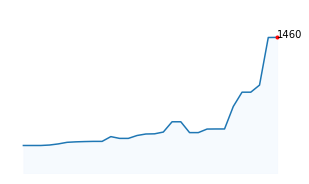
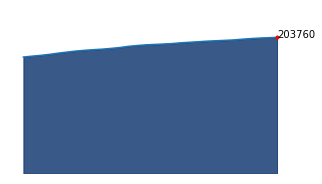
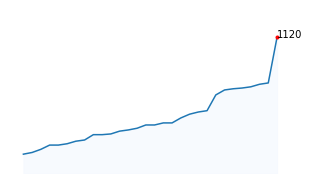
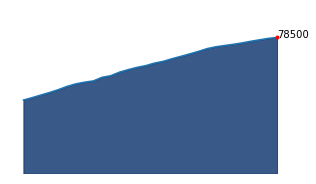
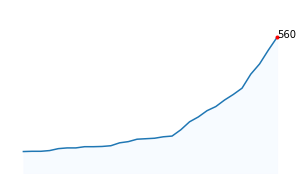
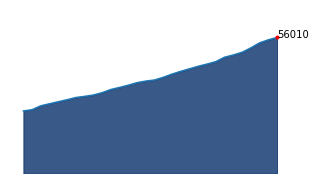
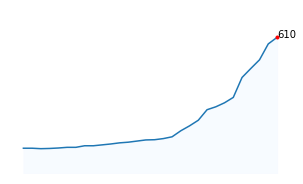
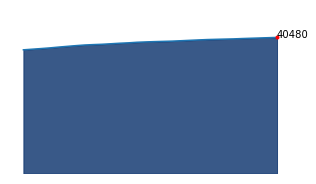
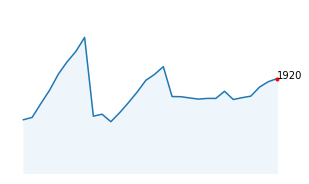
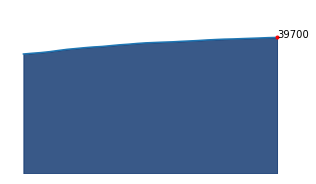
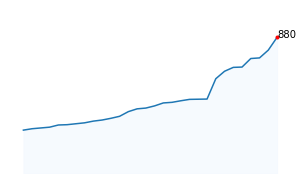
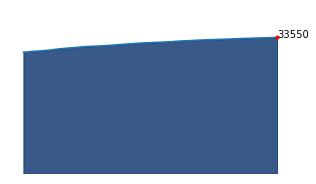
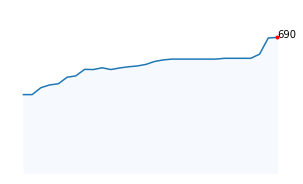
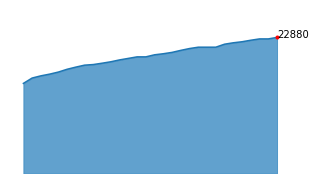
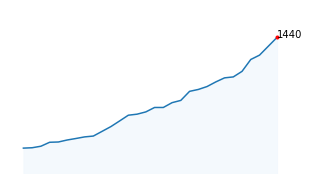
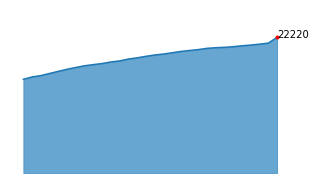
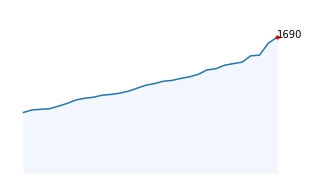
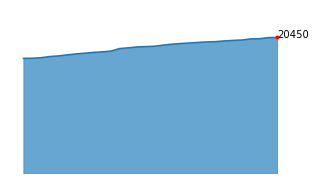
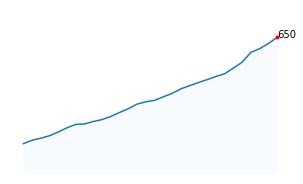
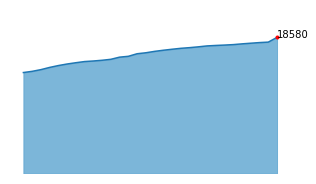
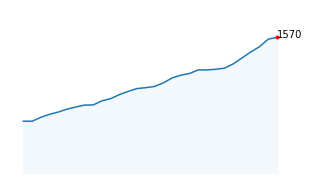
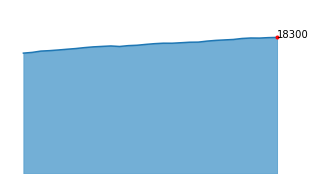
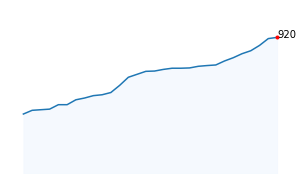
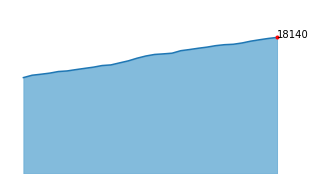
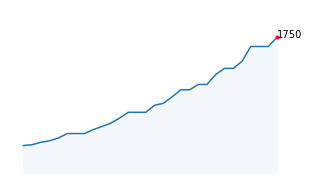
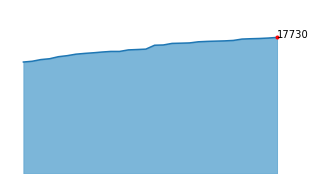
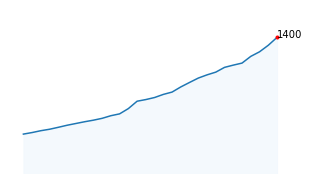
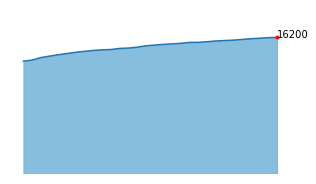
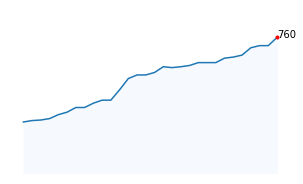
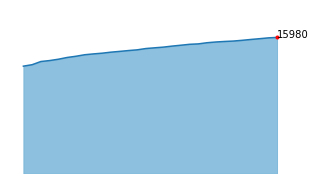
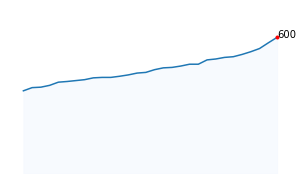
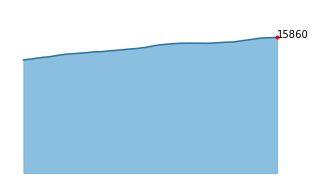
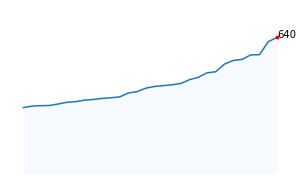
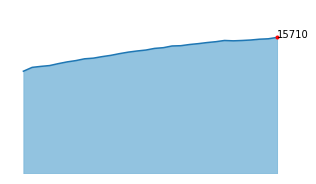
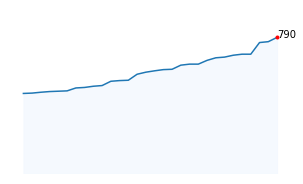
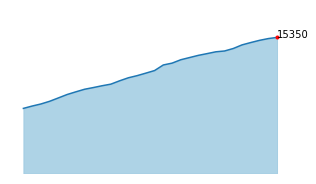
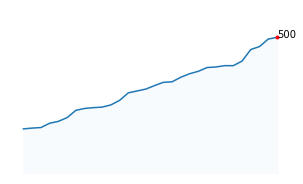
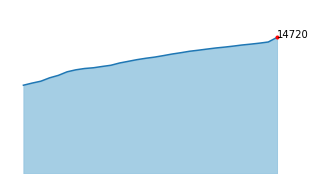
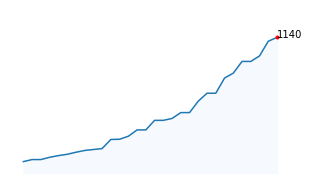
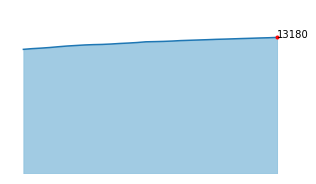
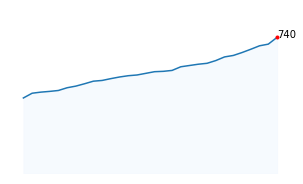
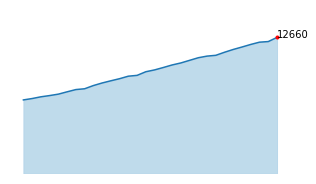
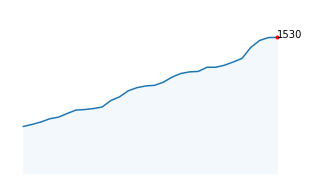
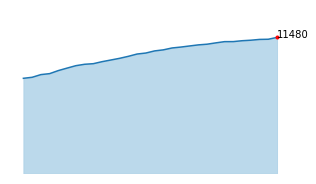
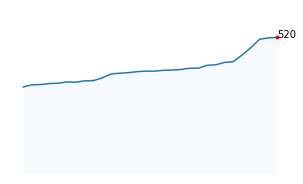
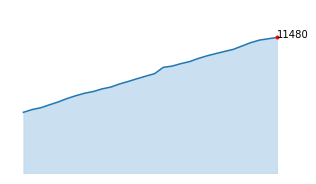
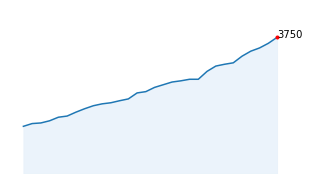
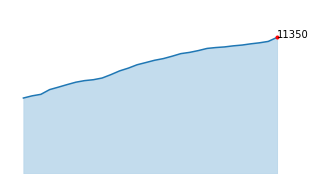
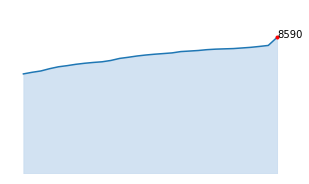
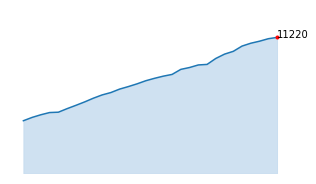
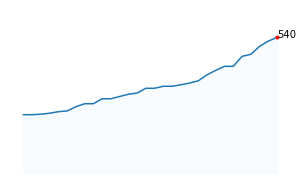
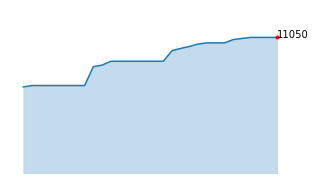
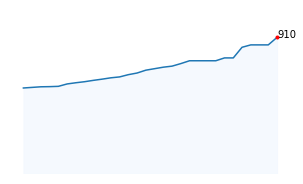
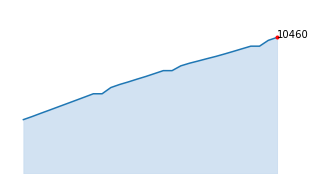
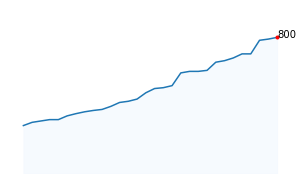
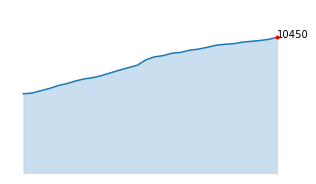
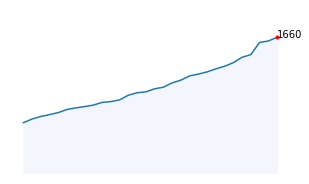
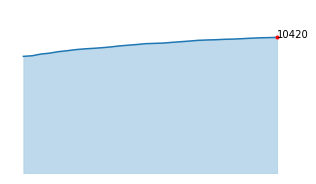
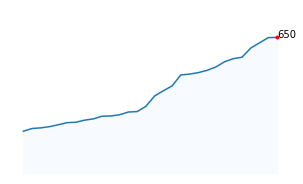
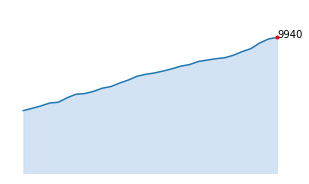
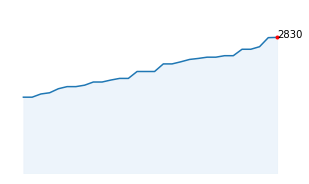
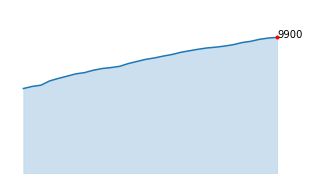
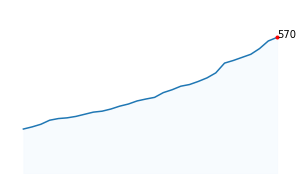
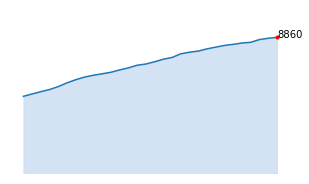
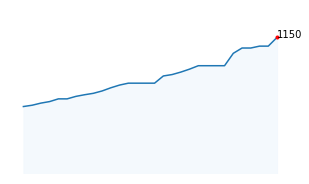
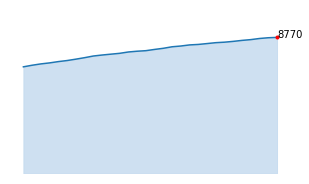
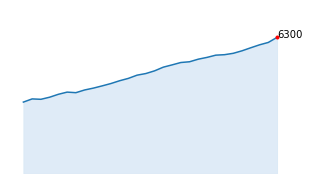
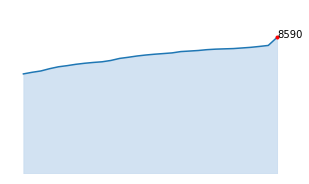
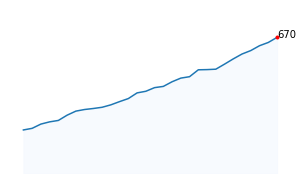
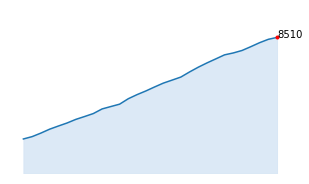
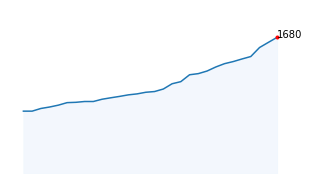
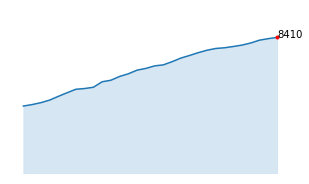
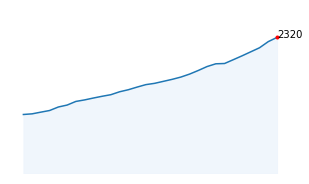
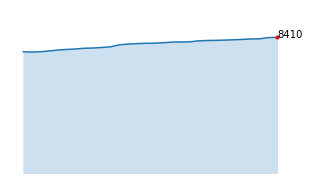
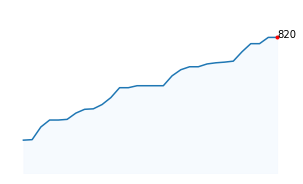
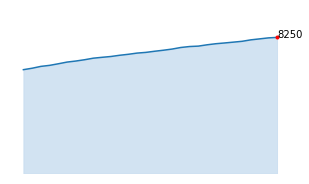
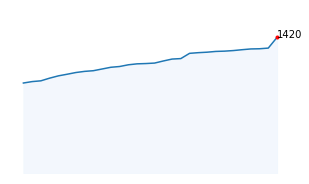
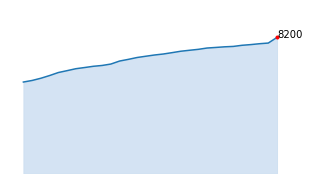
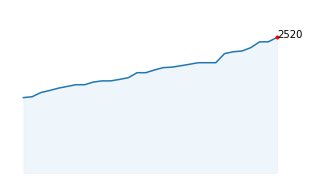
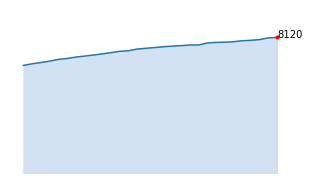
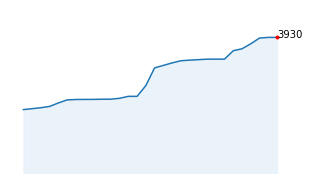
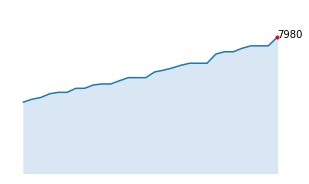
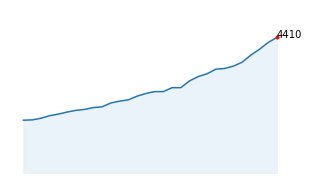
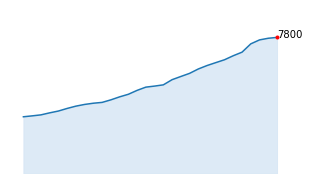
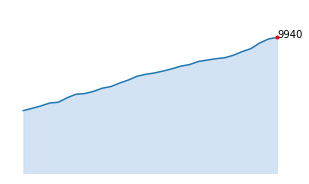
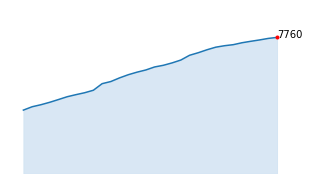
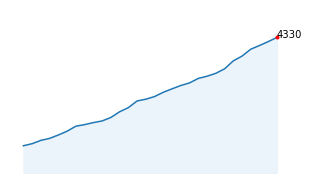
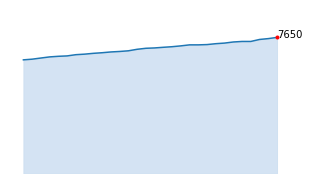
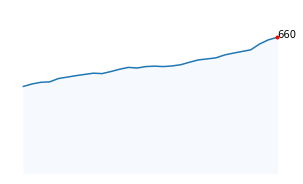
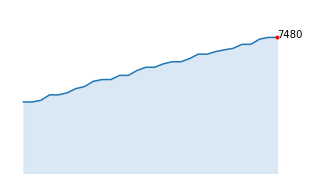
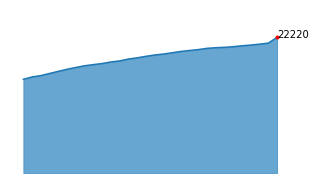
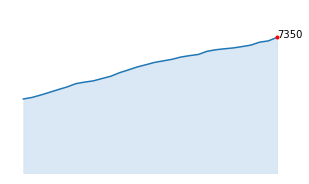
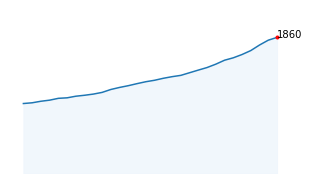
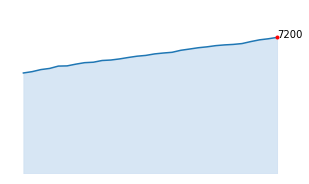
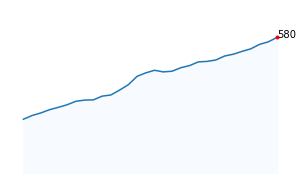
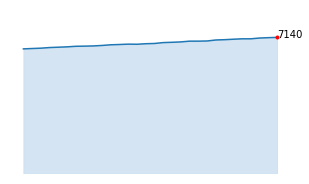
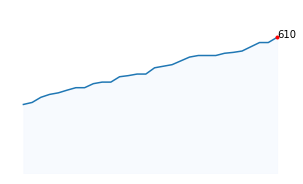
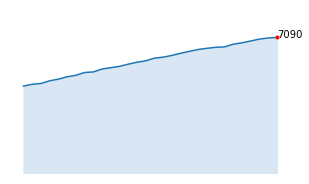
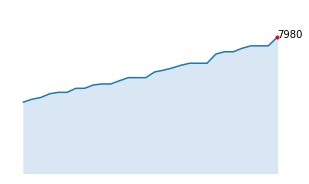
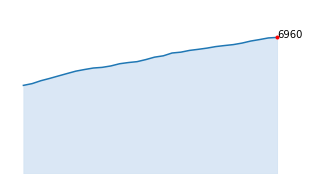
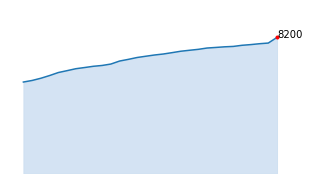
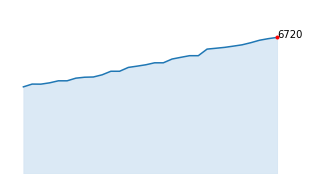
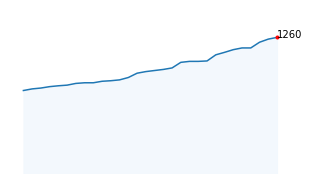
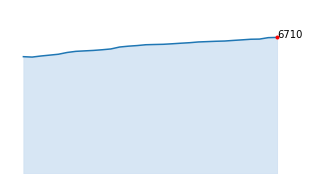
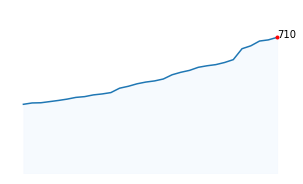
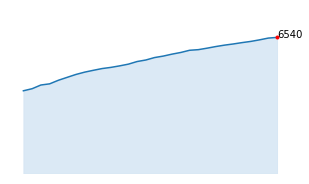
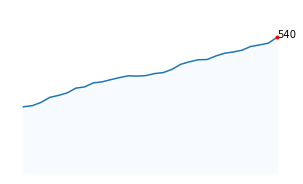
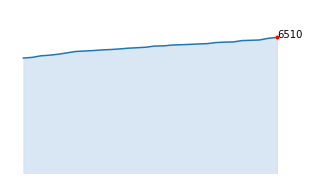
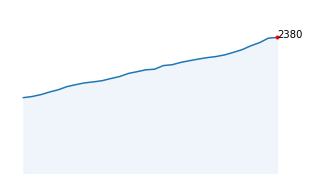
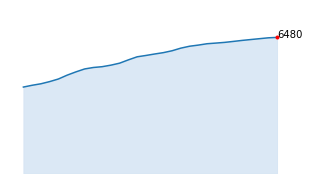
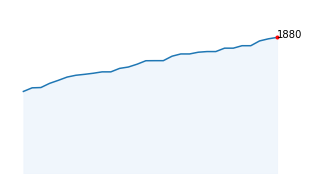
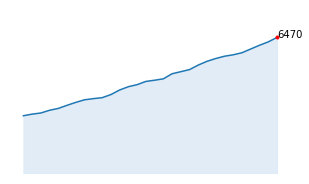
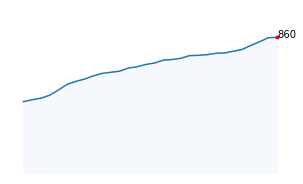
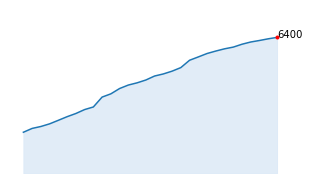
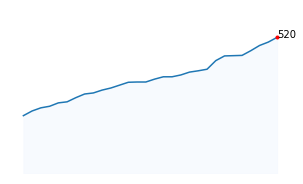
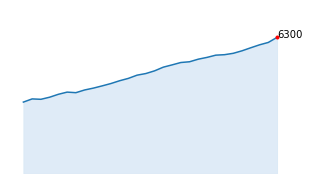
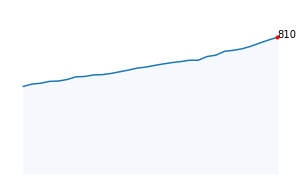
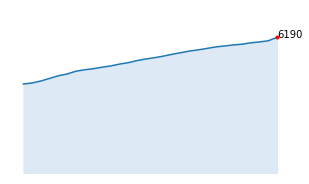
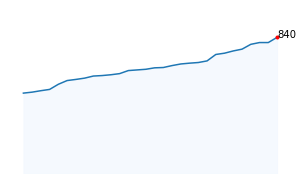
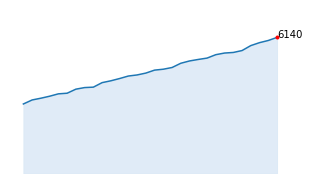
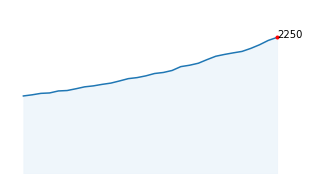
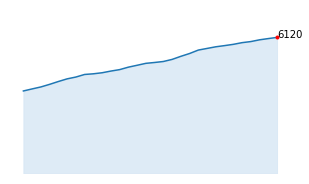
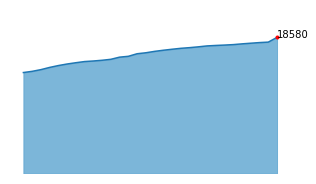
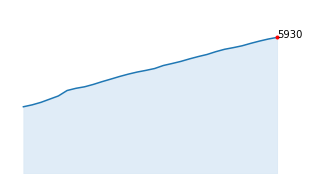
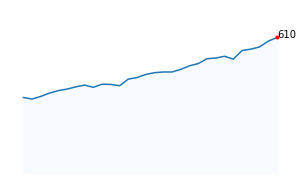
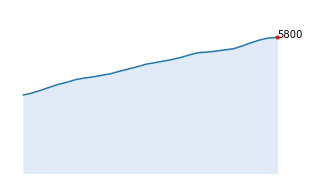
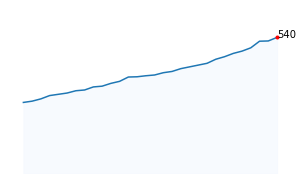
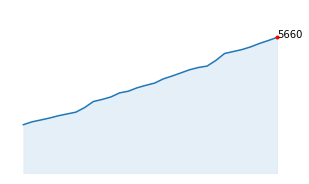
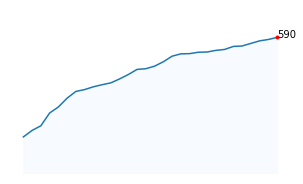
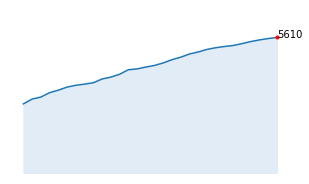
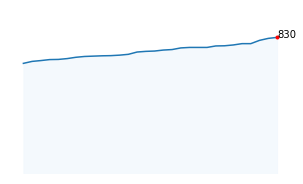
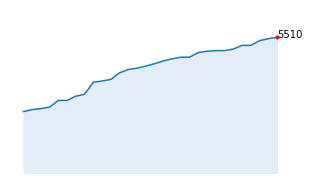
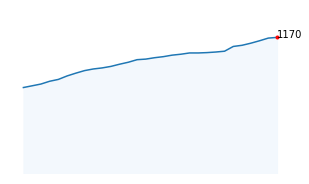
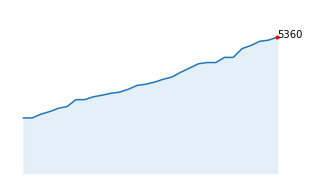
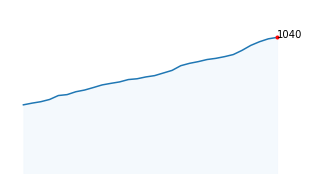
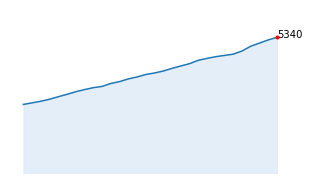
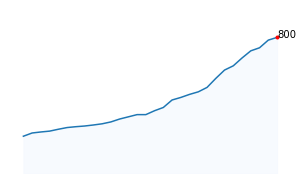
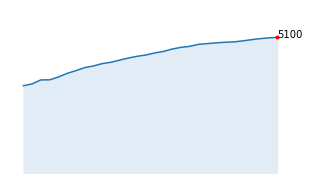
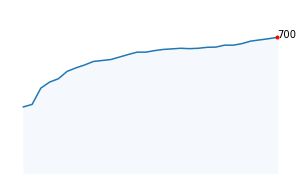
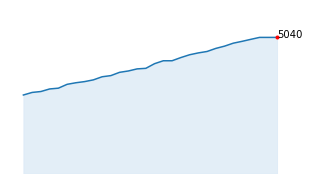
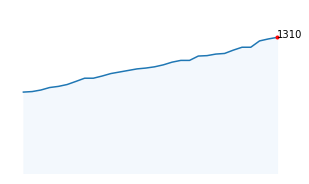
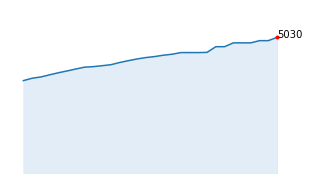
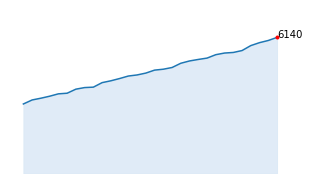
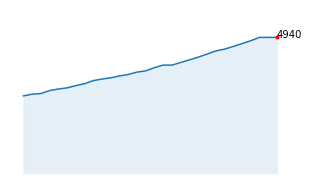
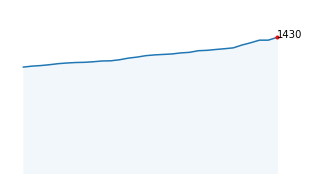
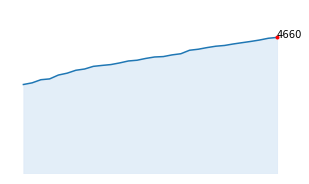
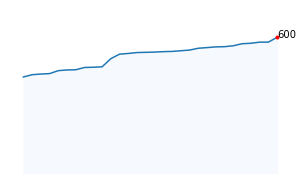
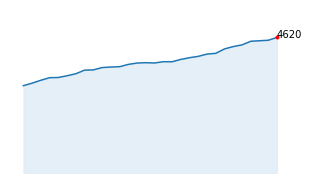
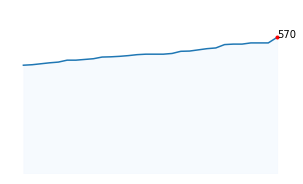
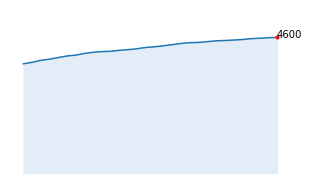
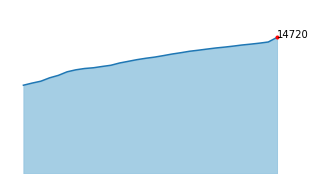
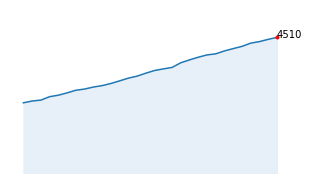
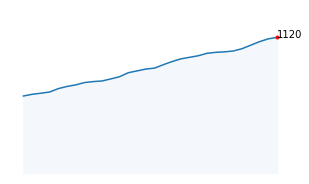
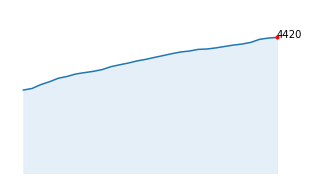
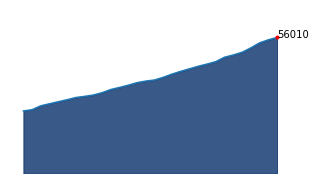
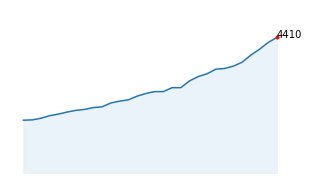
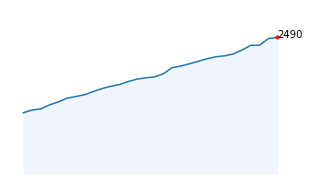
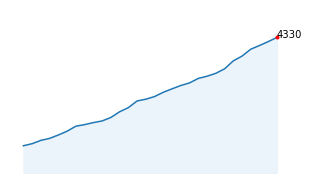
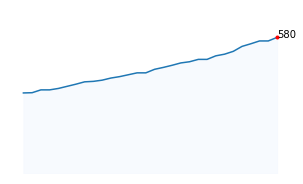
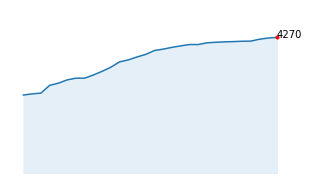
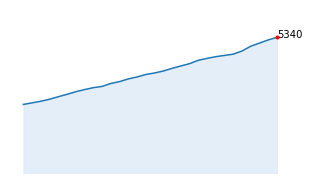
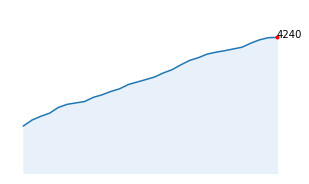
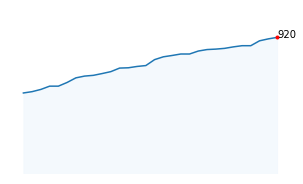
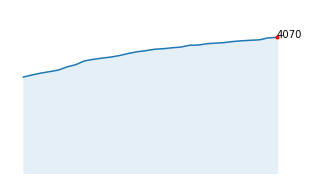
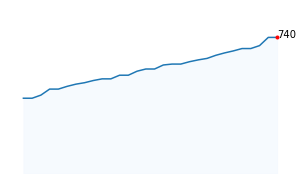
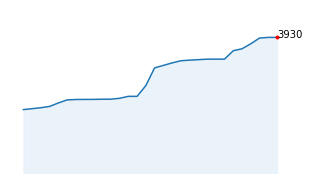
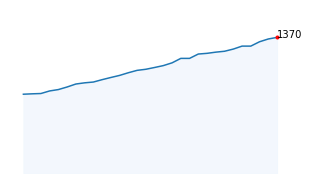
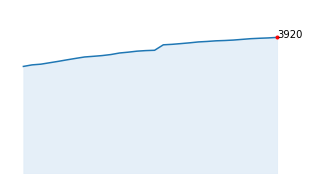
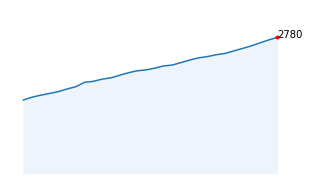
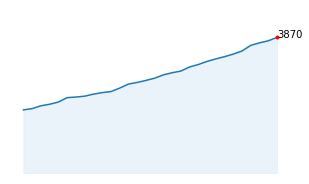
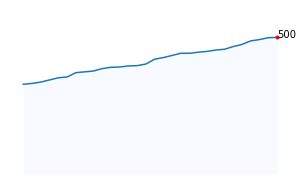
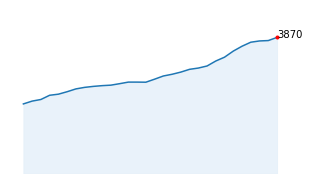
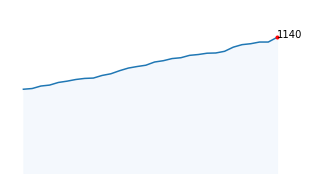
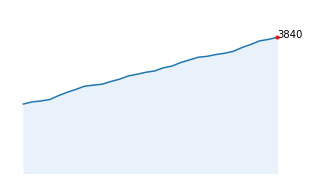
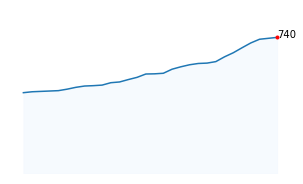
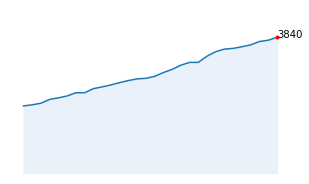
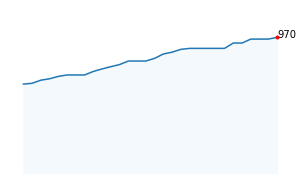
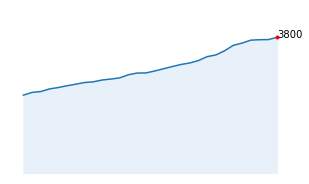
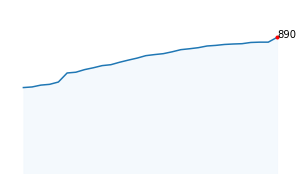
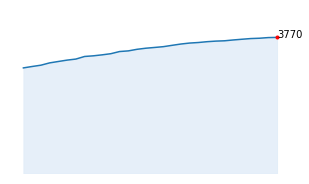
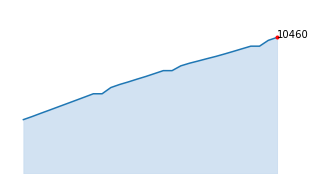
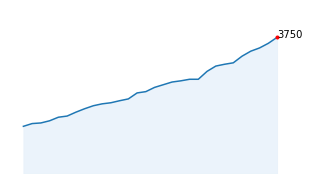
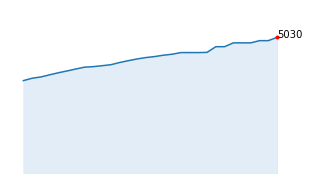
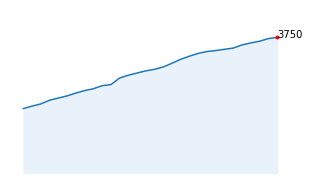
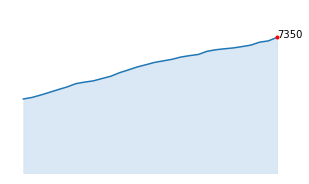
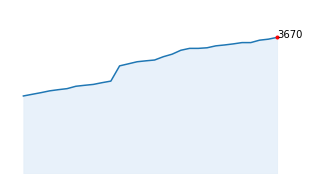
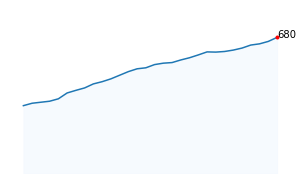
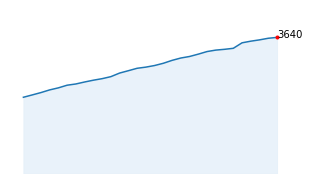
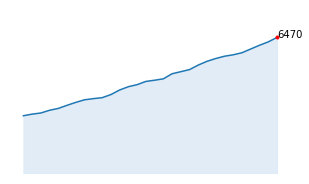
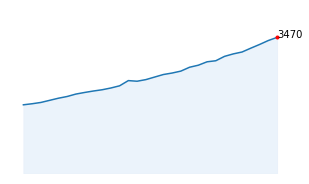
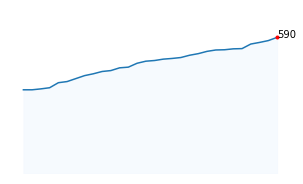
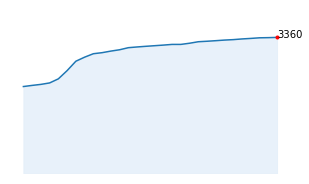
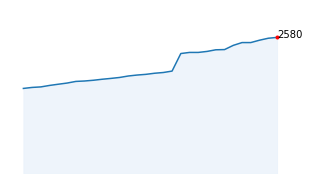
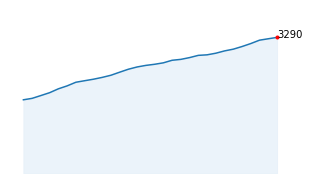
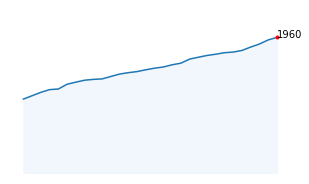
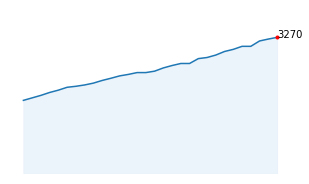
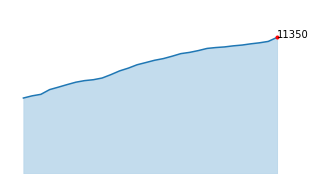
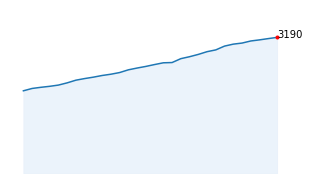
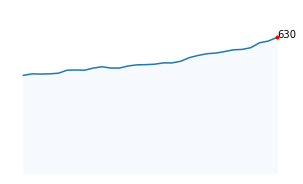
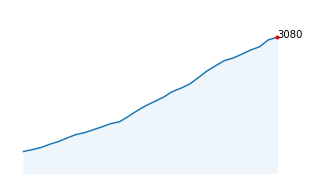
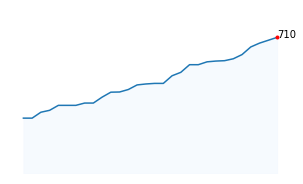
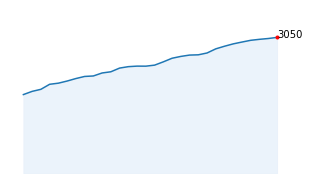
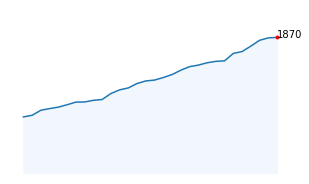
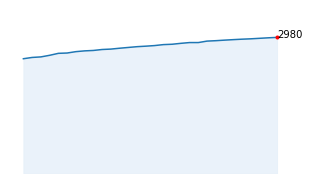
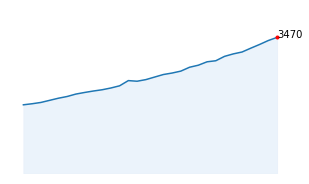
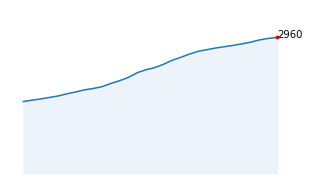
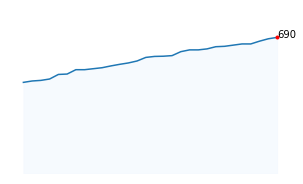
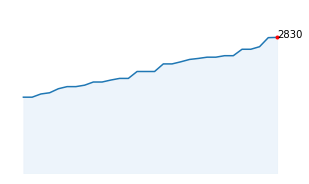
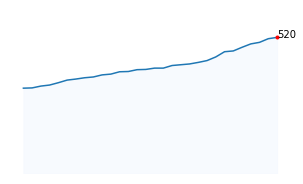
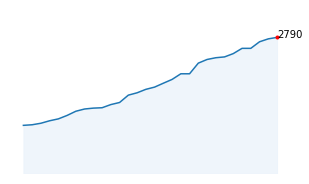
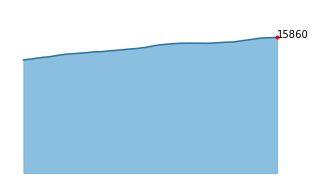
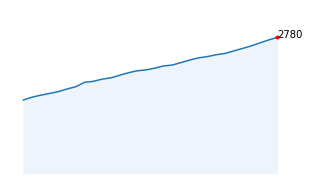
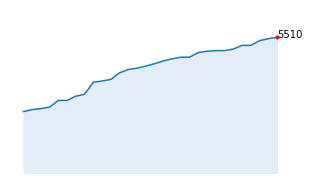
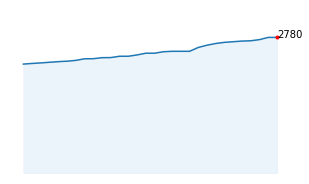
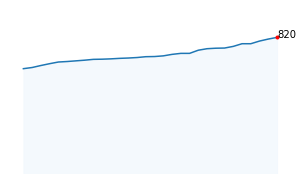
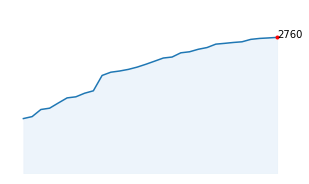
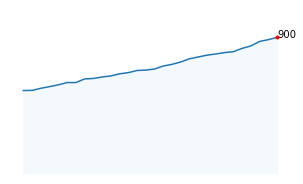
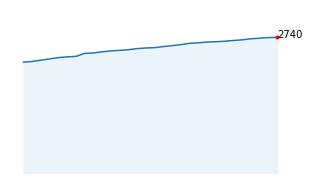
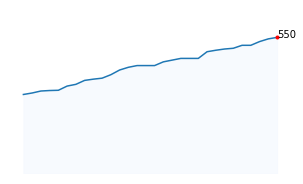
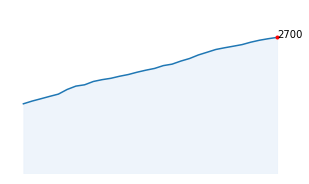
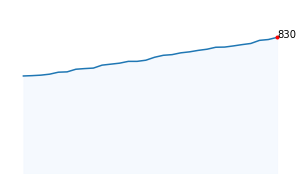
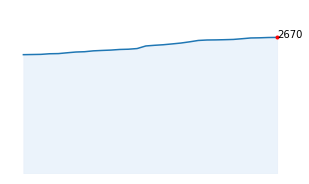
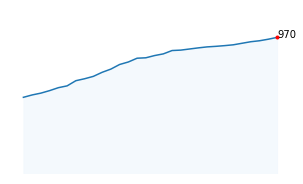
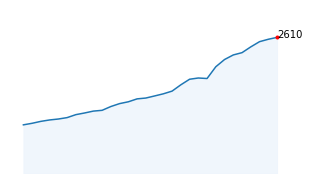
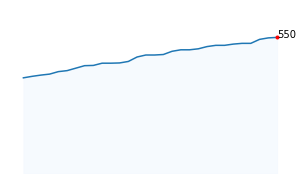
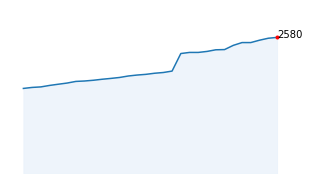
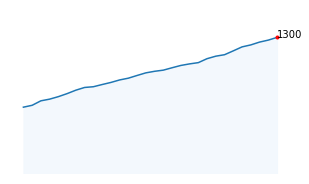
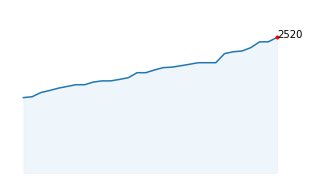
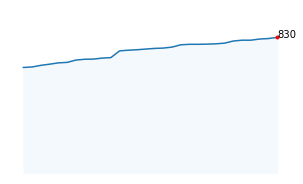
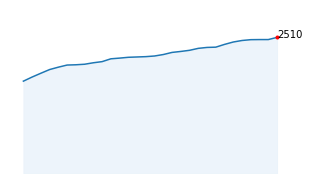
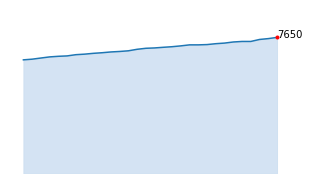
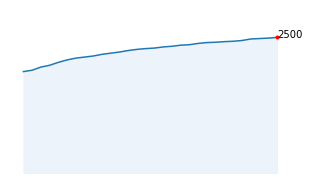
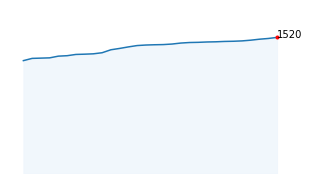
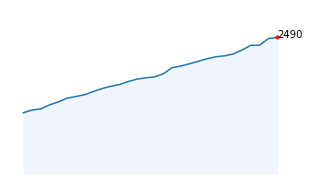
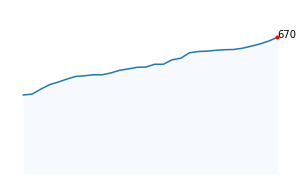
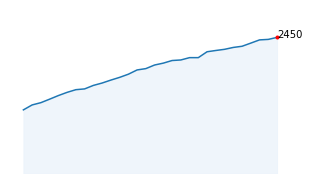
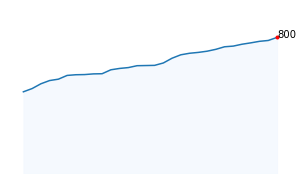
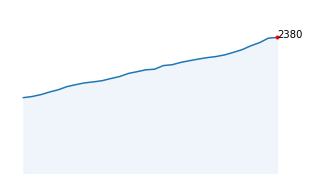
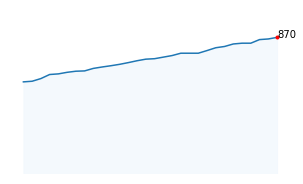
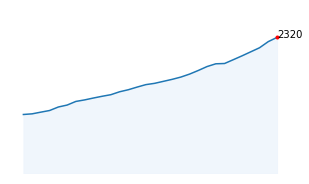
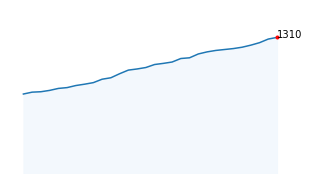
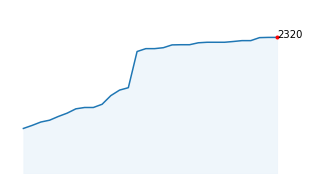
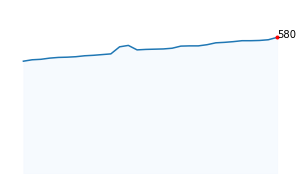
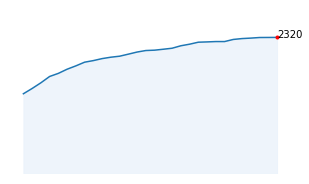
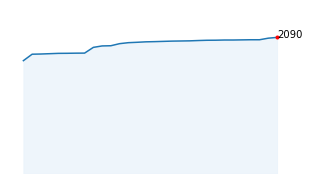
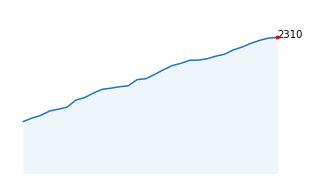
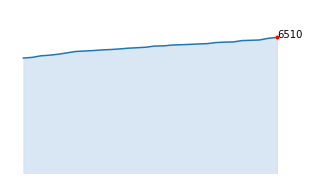
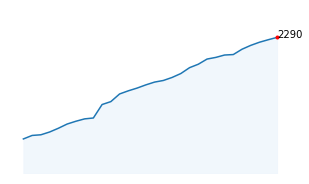
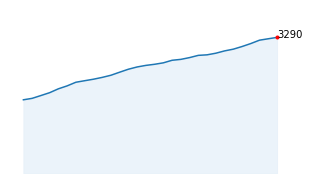
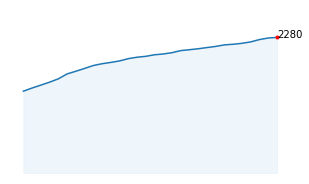
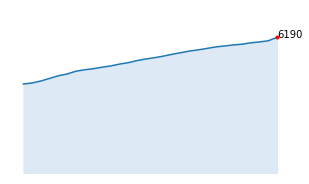
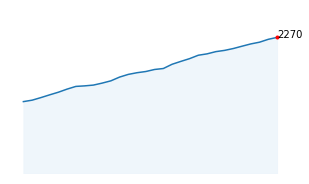
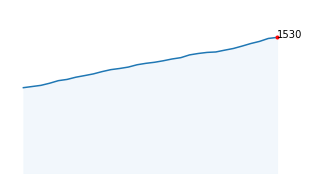
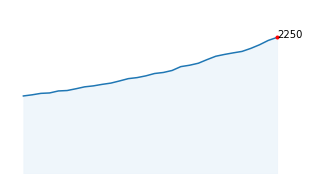
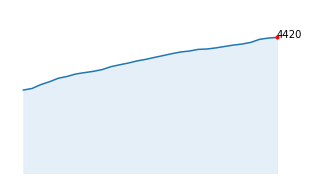
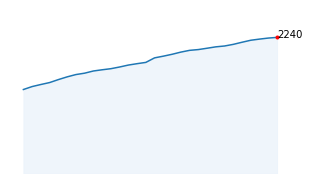
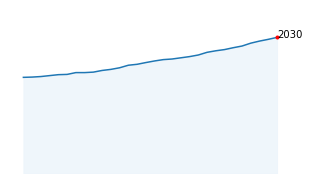
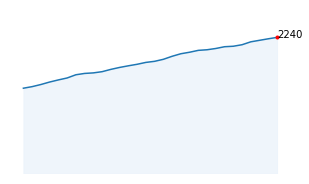
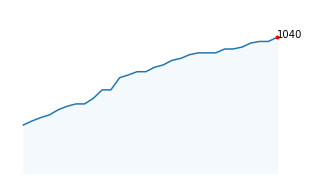
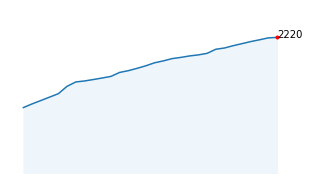
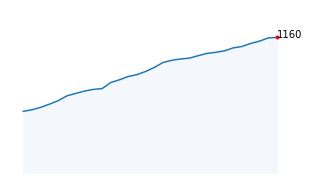
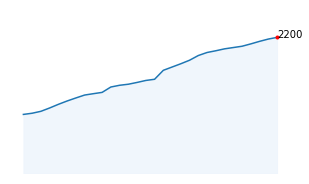
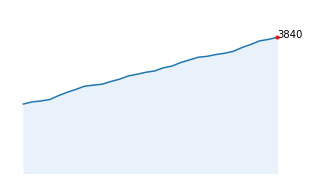
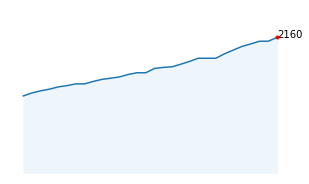
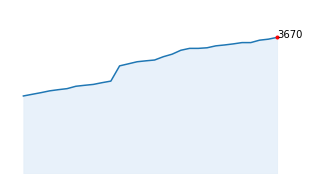
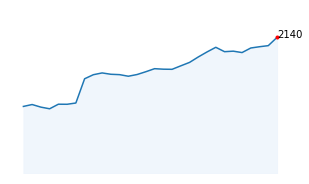
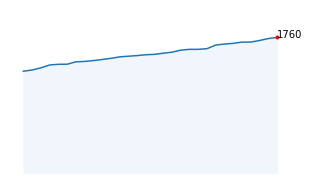
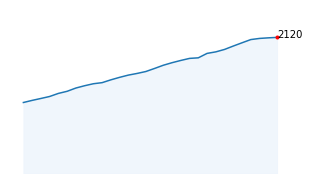
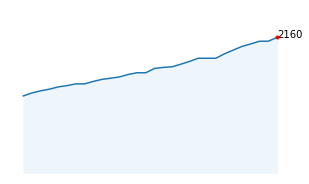
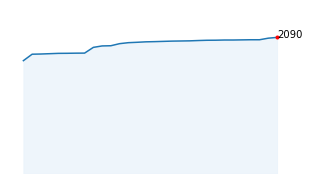
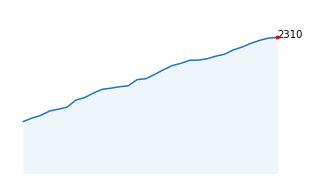
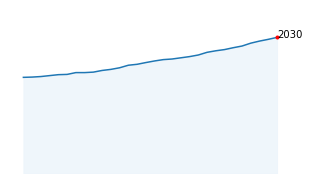
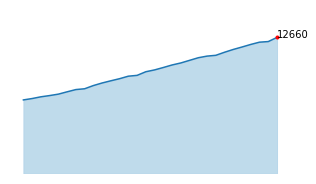
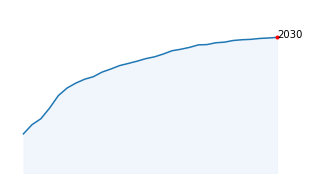
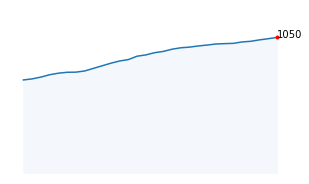
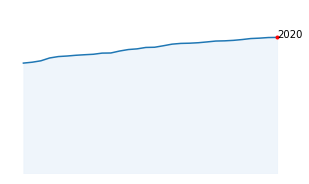
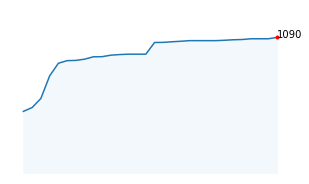
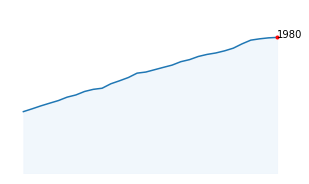
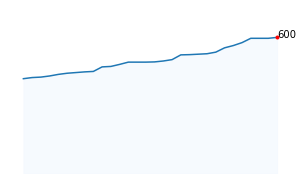
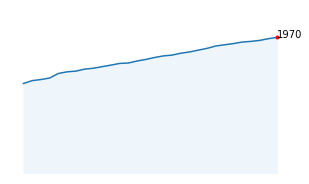
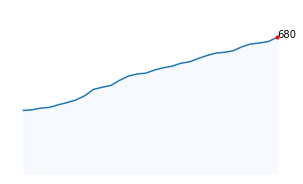
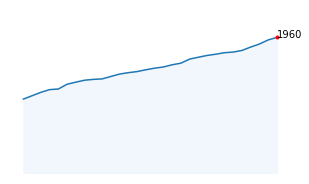
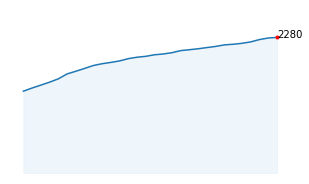
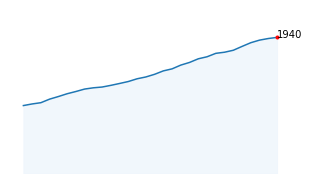
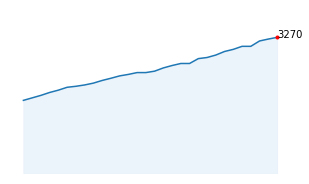
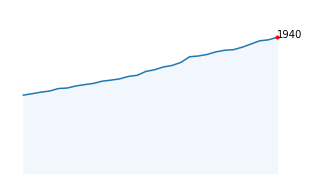
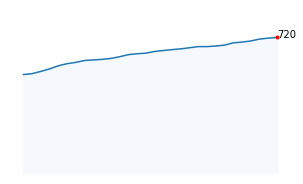
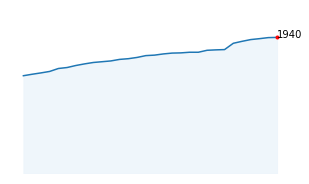
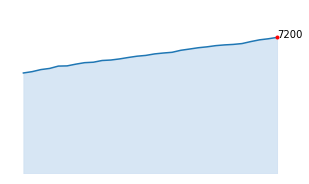
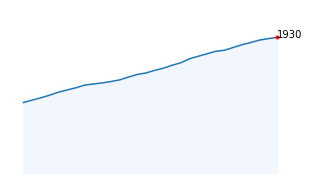
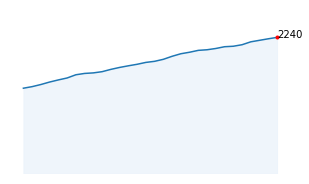
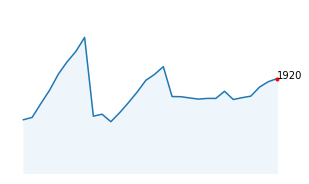
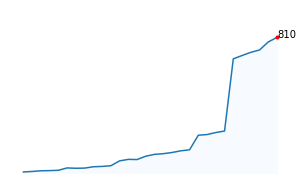
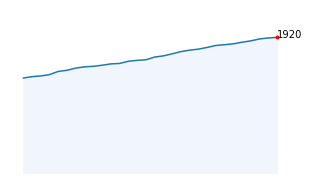
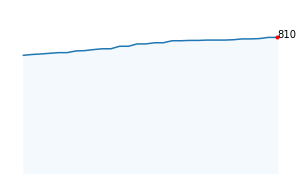
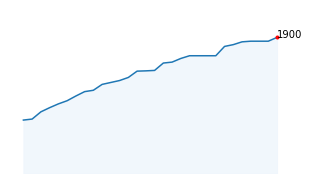
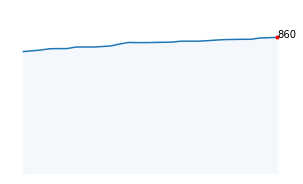
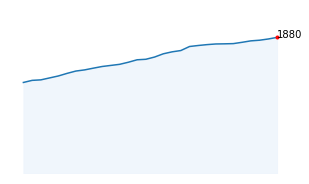
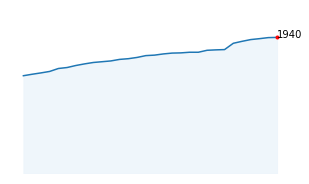
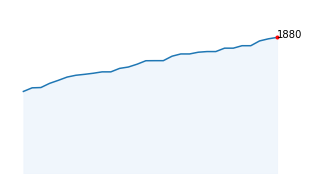

In [6]:
display(HTML('<h3>COVID-19 HotSpots in USA by Fastest Growing Area  and Most Cases Reported (side-by-side) </h3>'))
top2=ndf.sort_values(by='Max',ascending=False).head(150).copy()
top2['TotalCases']=top2.data.map( lambda x: '<img src="data:image/png;base64,{}"/>'.format(sparkline(x)))
top2['Population']=top2.Index.map(lambda x: get_population(x))
top2['Cases per 1000']=(top2.Max*1000/ top2.Population).astype(float).round(0)
top2.fillna(2,inplace=True)
top2['Cases per 1000']=top2['Cases per 1000'].astype(int)
top2 = top2.loc[:,['Name','State','TotalCases','Cases per 1000']]
top2.reset_index(inplace=True)
del top2['index']
top2.columns=['Most Cases Reported Area',' State','Total Cases Trend','cases per 1000']
pd.concat([top,top2],axis=1).fillna(0).style.hide_index().set_properties(**{
    'font-size': '11pt',
}).format({'cases per 1000': "{:,.0f}"})

In [10]:
from IPython.core.display import HTML,display,Image
display(HTML('<a href="http://www.cov2response.com"> Back to cov2response.com </a>'))